

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/


In [141]:
# Import relevant libraries reading data
import numpy as np
import pandas as pd

In [142]:
# Reading the dataset
df = pd.read_csv('../DATA/moviereviews.csv')

In [143]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [144]:
#Check to see if there are any missing values in the dataframe.**

In [145]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [146]:
# Remove any reviews that are NaN**
df = df.dropna()

In [147]:
df['review'].isnull().sum()

0

In [148]:
# Check if there are any large balnks in 'review'
df[df['review'].str.isspace()]
# As it seen there are some large blanks in 'review' section

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [149]:
# Removing any reviews that are larger blank string
df = df[~df['review'].str.isspace()]

In [150]:
# Check out if there is any large blanks in 'review'
df[df['review'].str.isspace()].sum()

label     0.0
review    0.0
dtype: float64

In [151]:
# Check to see if there is no space in blank string
df['review'].apply(lambda i:i=="").sum()

0

In [152]:
# Check out the data frame if there is any NAN data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [153]:
# Confirm the value counts per label:**
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

In [154]:
# Split the data into features and a label (X and y)
X = df['review']
y = df['label']

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
# Training the data
# Perform a train/test split.
# Using `test_size=0.20, 'random_state'=101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [157]:
# Import pipeline to develop different model
from sklearn.pipeline import Pipeline
# Import TfidfVectorizer to count and transform texts to a matrix
from sklearn.feature_extraction.text import TfidfVectorizer
# Import some algorithms to compare which ones work better 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression
# Metrics to evalutes our model performance
from sklearn.metrics import plot_confusion_matrix,classification_report

In [158]:
# Using 'Pipline' for implementing the desire model
# Develponig model using 'LinearSVC'
pipe = Pipeline([('tfidf',TfidfVectorizer()),('lsvc',LinearSVC())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lsvc', LinearSVC())])

In [159]:
# Defining a function for evaluating various models
def report(model):
    prd = model.predict(X_test)
    print(classification_report(y_test,prd))
    plot_confusion_matrix(pipe,X_test,y_test)

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



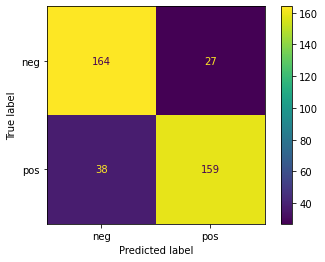

In [160]:
# 'LinearSVC' model performance
report(pipe)

In [161]:
# 'MultinomialNB' model performance
pipe = Pipeline([('tfidf',TfidfVectorizer()),('nb',MultinomialNB())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

              precision    recall  f1-score   support

         neg       0.75      0.92      0.83       191
         pos       0.90      0.70      0.79       197

    accuracy                           0.81       388
   macro avg       0.83      0.81      0.81       388
weighted avg       0.83      0.81      0.81       388



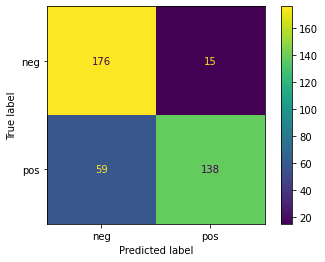

In [162]:
report(pipe)

In [163]:
# 'RandomForest' model performance
pipe = Pipeline([('tfidf',TfidfVectorizer()),('rf',RandomForestClassifier())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])

              precision    recall  f1-score   support

         neg       0.72      0.84      0.77       191
         pos       0.81      0.69      0.74       197

    accuracy                           0.76       388
   macro avg       0.77      0.76      0.76       388
weighted avg       0.77      0.76      0.76       388



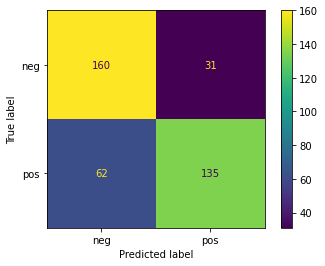

In [164]:
report(pipe)

In [165]:
# After comparison different algorithms performance we realized the 'LinearSVC' works greater
# Develop the model on entire dataset(X and y)
pipe = Pipeline([('tfidf',TfidfVectorizer()),('lsvc',LinearSVC())])
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lsvc', LinearSVC())])

In [179]:
# Importing one of the negetive unlabeled test data to verify the model performance
with open('../DATA/test/neg/8_2.txt') as mytext:
        words_one= mytext.read()

In [180]:
words_one

"I'm not a big fan of musicals, although this technically might not qualify as a musical. But I thought I would give it a chance as I love war movies. It was mediocre at best.<br /><br />Hudson seems totally out of kilter in this role. It just didn't work for me. Julie Andrews probably played her part as best as she could, but I just find it hard to buy her as a conniving, deceptive spy. Sorry, I know that is classic stereotyping on my part. But I have to say I think this is Julie at her most beautiful and feminine looking. I always thought of her as more matronly, but then surely that's a result of her roles in Sound of Music and Mary Poppins. No doubt they were desperately trying to get her out of that typecasting in this role. She was quite beguiling in appearance here, but I still didn't buy her as a spy.<br /><br />I couldn't keep my focus through the whole movie and found myself tuning in and out - and having conversations with those in my room (which I usually never do - I'm alw

In [181]:
# The model perdicted it as "neg" label correctly 
pipe.predict([words_one])

array(['neg'], dtype=object)

In [93]:
with open('8_9.txt') as mytext:
        words_two= mytext.read()

In [94]:
pipe.predict([words_two])

array(['neg'], dtype=object)

In [95]:
words_two

'I\'m a Petty Officer 1st Class (E-6) and have been in the USCG for 6 years and feel that this movie strongly represents the Coast Guard. There were only a few scenes that were far fetched. The most far-fetched was when PO Fischer (Kutcher) went down inside of the sinking vessel to pull the vessel\'s captain out of the engine room... that would never happen. Swimmers are not allowed to go inside of any vessel no matter the circumstances. Second, the Command Center (supposedly in Kodiak), it looked more like a NASA command center... we don\'t have any gear that hi-tech. Third, the Captain of the Airstation would not be running the search & rescue cases with like 10 people on watch. In reality it would be an E-6 or E-7 as the SAR Controller and maybe 2 other support personnel like an assist SAR Controller & a Radio Watchstander. Otherwise the movie was dead on, I think they should have incorporated more of the other rates in the CG and their roles in search & rescue instead of just Aviat

In [183]:
# Importing one of the positive unlabeled test data to verify  model performance
with open('../DATA/test/pos/19_10.txt') as mytext:
        words_two= mytext.read()

In [185]:
#  # The model perdicted it as "pos" correctly 

pipe.predict([words_two])

array(['pos'], dtype=object)